In [4]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

## ANOVA 검정

- **STEP 1: 가설 설정**  
  - H₀: 귀무가설  
  - H₁: 대립가설  

- **STEP 2: 검정 방법 선택**  
  - z-검정, t-검정, 카이제곱, F-검정 등  

- **STEP 3: 유의수준 결정**  
  - 보통 **α = 0.05** 사용  

- **STEP 4: 검정통계량 & p-value 계산**  
  - 표본 → 검정통계량 → p-value  

- **STEP 5: 결론**  
  - p ≤ α → 귀무가설 기각  
  - p > α → 귀무가설 채택(유지)


### 기본 예제

#### One-way ANOVA (일원 분산분석)

In [5]:
# 각 반의 점수
a = [61, 87, 79, 64, 90, 60, 52, 49, 51, 92, 72, 38, 77, 87, 39, 92, 99, 77, 49, 94, 76, 83, 45, 78, 91]
b = [54, 57, 75, 85, 62, 87, 83, 93, 77, 82, 52, 81, 26, 55, 42, 64, 69, 98, 58, 33, 46, 100, 50, 56, 31]
c = [49, 61, 69, 83, 75, 72, 48, 39, 29, 60, 37, 32, 50, 88, 97, 82, 42, 92, 49, 45, 59, 35, 79, 30, 36]

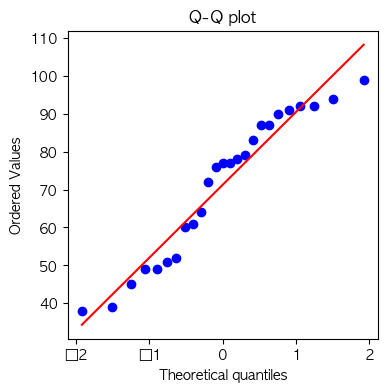

In [8]:
# q-q plot 

plt.figure(figsize=(4,4))
stats.probplot(a, plot=plt)
plt.title("Q-Q plot")
plt.show()

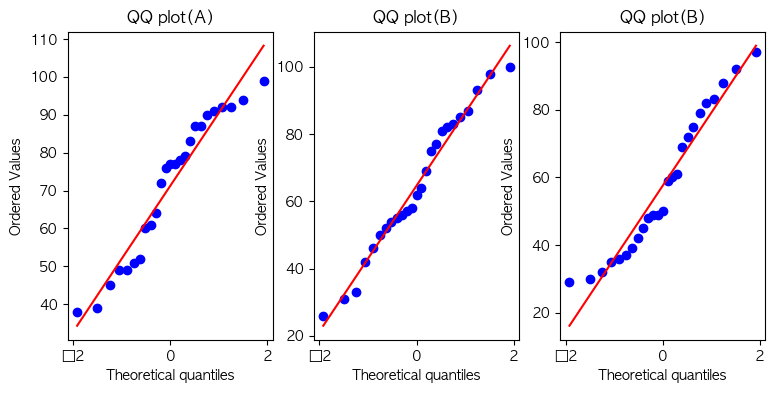

In [9]:
# qq-plot 시각화
fig, ax = plt.subplots(1,3, figsize=(9,4))
stats.probplot(a, plot=ax[0])
ax[0].set_title("QQ plot(A)")
stats.probplot(b, plot= ax[1])
ax[1].set_title("QQ plot(B)")
stats.probplot(c, plot= ax[2])
ax[2].set_title("QQ plot(B)")
plt.show()

세 집단 모두 정규성을 만족하는 것으로 보인다. 검정방법으로도 확인해보자

In [10]:
from scipy.stats import shapiro
stat_a, p_a = shapiro(a)
stat_b, p_b = shapiro(b)
stat_c, p_c = shapiro(c)

for p in [p_a,p_b,p_c]:
    if p >0.05:
        print("정규성을 만족한다고 볼 수 있음(귀무가설 기각 불가)")
    else:
        print("정규성을 만족하지 않음(귀무가설 기각)")

정규성을 만족한다고 볼 수 있음(귀무가설 기각 불가)
정규성을 만족한다고 볼 수 있음(귀무가설 기각 불가)
정규성을 만족한다고 볼 수 있음(귀무가설 기각 불가)


예상대로 a,b,c 모두 정규성을 만족한다.

(2) 등분산성

일방적으로 자주 사용하는 Levene’s test를 이용해서 확인하자.

In [ ]:
# 등분산성 검정 :Levene 검정
stat, p = stats.levene(a,b,c)
print("Levene Test: stat = ", stat, "p-value =",p)

if p > 0.05:
    print("등분산성 가정 만족(일반 ANOVA 사용가능)")
else:
    print("등분산성 가정 불만족(Welch ANOVA 권장)")

Levene Test: stat =  0.21055341835034663 p-value = 0.8106328207411102
등분산성 가정 만족(일반 ANOVA 사용가능)


#### Two-way ANOVA (이원 분산 분석)

In [11]:
data = {
 'A반_남':[61, 79, 83, 64, 62, 76, 62, 83, 26, 68, 65, 36, 87, 30, 65, 73, 31, 30, 58, 30, 86, 86, 61, 79, 97, 76, 50, 73, 28, 58, 48, 46, 90, 84, 51, 73, 41, 60, 97, 92],
 'A반_여':[87, 91, 83, 80, 75, 28, 97, 81, 60, 34, 99, 68, 42, 72, 62, 63, 46, 92, 57, 85, 42, 94, 42, 45, 75, 60, 88, 49, 54, 86, 63, 29, 58, 53, 72, 83, 58, 30, 63, 38],
 'B반_남':[85, 87, 86, 93, 82, 89, 26, 80, 41, 48, 73, 49, 80, 80, 48, 63, 69, 100, 60, 100, 37, 30, 98, 81, 39, 72, 77, 73, 69, 37, 90, 78, 49, 89, 65, 88, 69, 57, 59, 31],
 'B반_여':[57, 85, 35, 90, 62, 26, 72, 79, 94, 76, 60, 70, 28, 98, 90, 83, 54, 95, 62, 57, 84, 60, 42, 40, 97, 38, 55, 39, 68, 25, 62, 46, 51, 95, 95, 39, 84, 52, 62, 46]
 }

df = pd.DataFrame(data)


pd.melt(df, id_vars=None, value_vars=None, var_name=None, value_name='value')
- df: 변환할 원본 DataFrame입니다.
- id_vars: 고정할 열(변경하지 않을 열)을 지정합니다. 예를 들어, 학생 이름이나 ID와 같이 고정된 정보가 들어 있는 열입니다.
- value_vars: 변환할 열(여러 개의 값을 가진 열)을 지정합니다. ex. A반_남, A반_여, B반_남, B반_여
- var_name: 새로운 변수 이름을 지정합니다. ex. 반/성별
- value_name: 새로운 값 열의 이름을 지정합니다. ex. 점수

#### Repeated Measures ANOVA (반복측정 분산분석)

In [13]:
import pandas as pd

# 데이터 입력
names = ['은중', '상연', '상학', '재준', '세리','지우', '하은', '민준', '유진', '소민','동현', '예은', '도윤', '수민', '현우','지훈', '지아', '서연', '준호', '하준']

data = {
    'participant': names,
    'A': [1.1, 1.5, 1.0, 0.7, 0.8, 1.0, 1.5, 0.7, 1.2, 1.0, 1.1, 0.6, 1.3, 1.3, 0.6, 1.3, 0.6, 0.9, 1.6, 1.5],
    'B': [2.1, 1.6, 2.3, 2.6, 2.4, 1.7, 2.4, 2.2, 2.5, 2.1, 1.9, 2.8, 2.5, 2.6, 1.8, 2.9, 2.5, 2.8, 1.7, 2.3],
    'C': [3.6, 3.2, 2.6, 3.5, 3.3, 4.0, 2.9, 2.9, 2.7, 3.1, 3.2, 3.6, 2.8, 3.7, 2.8, 3.7, 2.6, 2.7, 2.6, 3.2]
}

df = pd.DataFrame(data)

# wide → long 형태로 변환

# diet를 범주형으로 변환



In [14]:
# qq-plot 시각화

In [15]:
from scipy.stats import shapiro

(2) 등분산성

In [16]:
# 등분산성 검정 :Levene 검정

(3) 구형성

참고) statsmodels
- 대체로 scipy, statsmodels를 사용하는 게 일반적이나 statsmodels는 구형성이 위반됐을 때, 보정을 제공하지 않기 때문에 반복측정 anova에서는 pingouin 함수를 사용했습니다. 

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# 반복측정 ANOVA 실행
anova = AnovaRM(df_long, depvar='weight_loss', subject='participant', within=['diet'])
result = anova.fit()

# 결과 출력
print(result)


### 카이제곱 독립성 검정

In [207]:
stroke_df= pd.read_csv("./stroke-data.csv")

- 귀무가설 : work_type과 ever_married는 독립적이다
- 대립가설 : work_type과 ever_married는 독립적이지 않다


Cramer's V 계산식
# $V = \sqrt{ \frac{\chi^2}{n \times \min(r - 1, c - 1)} }$


- χ^2는 카이제곱 통계량
- 𝑛은 전체 표본 크기 (데이터의 개수)
- r은 행의 개수
- c는 열의 개수

## 상관계수